### 이 코드는 시계로 모은 데이터를 불러와서 좌표를 찍어보는 노트북입니다.

2020/08/11 혜주 공부

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import glob
import matplotlib.pyplot as plt

In [2]:
!ls

20200721_S32_FossilHyejoo_C02_uphill	   map.html
20200728_S30_FossilHyeonjoo_C03_downhill   watch_gps.ipynb
20200806_S29_FossilSeonyoung_C03_downhill


In [3]:
#폴더 안의 모든 txt 불러오기
files = sorted(glob.glob('./20200721_S32_FossilHyejoo_C02_uphill/*.txt'))
print(np.shape(files))

(19,)


In [4]:
files

['./20200721_S32_FossilHyejoo_C02_uphill/45953_FossilHyejoo_20200721_184617_000_C2__readme.txt',
 './20200721_S32_FossilHyejoo_C02_uphill/45953_FossilHyejoo_20200721_184617_000_C2__sync.txt',
 './20200721_S32_FossilHyejoo_C02_uphill/45953_FossilHyejoo_20200721_184627_001_C2__sync.txt',
 './20200721_S32_FossilHyejoo_C02_uphill/45953_FossilHyejoo_20200721_184636_002_C2__sync.txt',
 './20200721_S32_FossilHyejoo_C02_uphill/45953_FossilHyejoo_20200721_184646_003_C2__sync.txt',
 './20200721_S32_FossilHyejoo_C02_uphill/45953_FossilHyejoo_20200721_184656_004_C2__sync.txt',
 './20200721_S32_FossilHyejoo_C02_uphill/45953_FossilHyejoo_20200721_184706_005_C2__sync.txt',
 './20200721_S32_FossilHyejoo_C02_uphill/45953_FossilHyejoo_20200721_184716_006_C2__sync.txt',
 './20200721_S32_FossilHyejoo_C02_uphill/45953_FossilHyejoo_20200721_184726_007_C2__sync.txt',
 './20200721_S32_FossilHyejoo_C02_uphill/45953_FossilHyejoo_20200721_184735_008_C2__sync.txt',
 './20200721_S32_FossilHyejoo_C02_uphill/45953_F

In [5]:
# readme 파일 제외
txt_files = []
for i in files:
    a = i.split('/')[2].split('__')[1].split('.txt')[0]
    if a != 'readme':
        txt_files.append(i)

In [6]:
# 모든 txt 파일을 하나의 df로 만들기
all_data = pd.DataFrame() 
for i in txt_files:
    data = pd.read_csv(i, sep="\t", header=None)
    all_data = all_data.append(data, ignore_index=True)

In [7]:
all_data.shape

(9000, 10)

In [9]:
all_data.head(4)

,0,1,2,3,4,5,6,7,8,9
0,1595324767372,1595324767372,-1.273,2.433,9.187,-0.018,-0.002,-0.009,127.737808,37.884075
1,1595324767393,1595324767390,-1.261,2.433,9.202,-0.021,0.008,-0.015,127.737808,37.884075
2,1595324767410,1595324767406,-1.288,2.461,9.240,-0.008,0.011,-0.023,127.737808,37.884075
3,1595324767428,1595324767426,-1.235,2.519,9.230,0.005,0.004,-0.023,127.737808,37.884075


In [10]:
# 시간과 좌표 column만 사용함.
data = all_data[[0,8,9]]

In [11]:
# 좌표에 변동이 있을 때마다 새로운 list에 좌표 저장, 시간 저장
location = []
time = []
longitude = []
latitude = []

for i in range(len(data)-1):
    longitude1 = data[8].iloc[i]
    longitude2 = data[8].iloc[i+1]
    latitude1 = data[9].iloc[i]
    latitude2 = data[9].iloc[i+1]
    if longitude1 != longitude2 or latitude1 != latitude2:
        location.append([round(latitude1, 6), round(longitude1, 6)])
        time.append(data[0].iloc[i])
        longitude.append(round(longitude1, 6))
        latitude.append(round(latitude1, 6))

In [12]:
location[:5]

[[37.884075, 127.737808],
 [37.884083, 127.737808],
 [37.884075, 127.737808],
 [37.884075, 127.737801],
 [37.884075, 127.737808]]

In [13]:
# millisecond인 시간을 분:초의 형태로 변환해서 리스트에 저장
import datetime

t = []
marker = []
for i, idx in enumerate(time):
    if i == 0:
        t1 = idx
    n = round((idx - t1)/1000, 1)
    min, sec = divmod(n, 60)
    tt = "%02d:%02d" % (min, sec)
    t.append(tt)
    marker.append([latitude[i], longitude[i], t[i]])
    #print(tt)

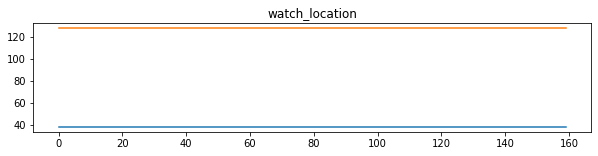

In [14]:
f1 = plt.figure(figsize=(10, 2))
plt.plot(location)
plt.title('watch_location')
plt.show()

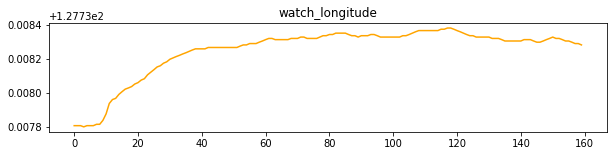

In [15]:
f1 = plt.figure(figsize=(10, 2))
plt.plot(longitude, c='orange')
plt.title('watch_longitude')
plt.show()

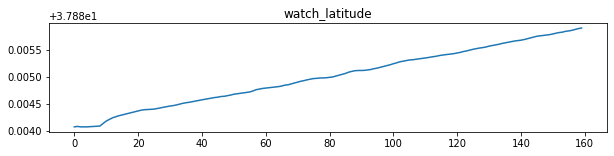

In [16]:
f1 = plt.figure(figsize=(10, 2))
plt.plot(latitude)
plt.title('watch_latitude')
plt.show()

In [17]:
# 지도 위에 찍어보기
import folium
map_osm = folium.Map(location=[37.884998, 127.738342], zoom_start=17)

In [18]:
end = len(location)

for i, idx in enumerate(location):
    #print(i, idx)
    if i == 0:
        folium.Marker(location=idx, popup='Start', icon=folium.Icon(color='green',icon='star')).add_to(map_osm)
    elif i == end-1:
        folium.Marker(location=idx, popup='Finish time={}'.format(t[i]), icon=folium.Icon(color='red',icon='star')).add_to(map_osm)
    else:
        folium.Circle(location = idx, tooltip = marker[i], radius = 0.02).add_to(map_osm)

#### 점 위에 마우스를 가져다 대면 좌표와 시간확인 가능

In [19]:
map_osm

In [ ]:
#지도만 저장.
#map_osm.save('./map.html')  

* 시간 변환하는 부분
https://www.geeksforgeeks.org/python-program-to-convert-seconds-into-hours-minutes-and-seconds/